<center><h1> Reinforcement Learning Lab Problem Sheet - 3 - Intelligent Tutoing System</h1></center>
<hr><font size=4>
Intelligent Tutoring System is a recommendation system. One of the most important
task of an ITS is to recommend new learning objects (materials) to learners in e-learning
systems. Assuming that the task is to recommend courses to learners with the purpose of
giving the learners courses with highest rate of finishing.<br>
There are N courses that the ITS can recommend to learner. Each course has an
unknown rate of success pi. ai and bi is the historical number of success (number of learners
that finished the course) and failure (number of learners that dropped the course). Model it as
MAB and define the regret of a strategy after T plays as:</font>

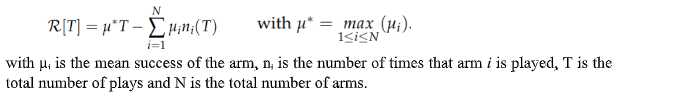

In [ ]:
#Importing libraries
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Courses:
  '''
  Class to define the nature of each course
  reward distribution etc
  '''
  def __init__(self):
    '''
    Constructor function to define class members
    :params None
    :return None
    '''
    #choosing the distribution
    self.Qt = 0 #running average of the rewards
    self.t = 0 #tracking the time steps

  def simulate(self):
    '''
    Simulate trials for arm
    :params None
    :return None
    '''
    #Drawing a sample from the reward distribution unknown rate of success pi.
    reward = random.uniform(0,1)

    #print("Reward:",round(reward,3)," Qt at time step:",self.t,"is:",round(self.Qt,3))

    #updating the running average and time steps
    self.Qt = self.Qt + ((1/(self.t+1))*(reward - self.Qt))
    self.t +=1

<hr><font size=4> Compare the regret of the following algorithms (graphs for simulated results)<br>
1. Decaying ε-greedy algorithm <br>
2. Apply UCB1 </font>

In [ ]:
#Decaying ε-greedy algorithm

eps   = 1/(np.log(0.00001))
num_arms   = int(input("Enter no of Courses you want:"))
bandit_arms = []
regret_decay_eps = []

for arm in range(num_arms):
  bandit_arms.append(Courses())

time_steps = int(input("No of time steps to simulate:"))
print()

for time_step_i in range(time_steps):
  if time_step_i == 0: #at time step zero i choose a arm randomly
    arm = random.choice([i for i in range(num_arms)])
    #print("At time step:",time_step_i,"Choosen arm:",arm)
    bandit_arms[arm].simulate()
    regret_decay_eps.append(0)
    #print("-"*40)

  else: #for all other time steps i choose the arm with max qt - greedy strategy
    probability_eps = random.uniform(0,1)

    Qt_arms = np.array([arm.Qt for arm in bandit_arms])
    #print(Qt_arms)

    if probability_eps>=eps:
      max_Qt_idx = random.choice([i for i in range(num_arms)])
    else:
        max_Qt_idx = np.argmax(Qt_arms)
    #print("At time step:",time_step_i,"Choosen arm:",max_Qt_idx)
    bandit_arms[max_Qt_idx].simulate()

    #Regret finding
    mx_regret = max(Qt_arms)*time_step_i
    cumm_regret = 0
    for i in range(num_arms):
      cumm_regret += (bandit_arms[i].Qt*bandit_arms[i].t)
    regret_decay_eps.append(mx_regret-cumm_regret)
    #print("-"*40)
  eps = 1/(np.log(0.00001 + time_step_i))
print([arm.Qt for arm in bandit_arms])

Enter no of Courses you want:100
No of time steps to simulate:2100

[0.5070103324262965, 0.6008508103085044, 0.43225372962174013, 0.4395412594756809, 0.5156349636998627, 0.47319990442112025, 0.5070348728301887, 0.4312059569284006, 0.4788740668808449, 0.5246649817668574, 0.41632117677168917, 0.48485830209726505, 0.5648121661696254, 0.545534582577833, 0.5073520757138346, 0.5477083377874418, 0.5265440270618579, 0.381001227987957, 0.44673776988476166, 0.4812768015385742, 0.49754277355639676, 0.49102294996887186, 0.5134923071854037, 0.44255011615200773, 0.46309563584825303, 0.527776428073764, 0.5115186461340574, 0.5257646400943349, 0.43534976475484466, 0.46230903367684933, 0.5521031701026837, 0.5240645157898847, 0.47313269730612695, 0.5336318651062606, 0.4817606697153984, 0.516131451501569, 0.5506303048539581, 0.5399562067045668, 0.5012978624141772, 0.4603661641820575, 0.5613484395070968, 0.37798867857069446, 0.5728401085321913, 0.4496964241682733, 0.5127424143990609, 0.5361170448467806, 0.

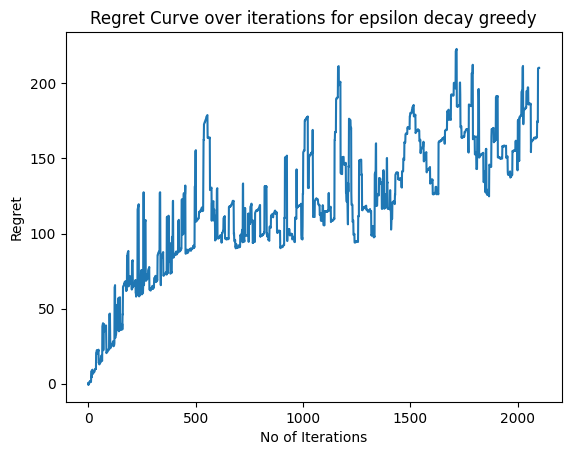

In [ ]:
plt.plot(regret_decay_eps)
plt.xlabel("No of Iterations")
plt.ylabel("Regret")
plt.title("Regret Curve over iterations for epsilon decay greedy")
plt.show()

In [ ]:
#UCB1 Algorithm

c = float(input("Enter constant c of UCB value:"))
num_arms   = int(input("Enter no of Courses you want:"))
bandit_arms = []
for arm in range(num_arms):
  bandit_arms.append(Courses())

#maintaining the count of each arm is picked
count_tracker = {}
for arm in range(num_arms):
  count_tracker[arm] = 0

regret_decay_ucb1 = []
time_steps = int(input("No of time steps to simulate:"))

for time_step_i in range(time_steps):

  if time_step_i == 0: #at time step zero i choose a arm randomly
    for arm in range(num_arms):
      bandit_arms[arm].simulate()
      count_tracker[arm] += 1
      #print(count_tracker)
      if arm==0:
        regret_decay_ucb1.append(0)
      else:
        Qt_arms = np.array([arm.Qt for arm in bandit_arms])
        #print(Qt_arms)
        mx_regret = max(Qt_arms)*(time_step_i+arm+1)
        #print(mx_regret)
        cumm_regret = 0
        for i in range(num_arms):
          cumm_regret += (bandit_arms[i].Qt*count_tracker[i])
        #print(cumm_regret)
        regret_decay_ucb1.append(mx_regret-cumm_regret)


  else: #for all other time steps i choose the arm with max qt - greedy strategy
    Qt_arms = np.array([arm.Qt for arm in bandit_arms])
    At_arms = np.array([arm.Qt for arm in bandit_arms])
    for i in range(len(Qt_arms)):
      At_arms[i] = Qt_arms[i] + c*((np.log(time_step_i)/count_tracker[i])**0.5)

    max_Qt_idx = np.argmax(At_arms)
    bandit_arms[max_Qt_idx].simulate()
    count_tracker[max_Qt_idx] += 1

    mx_regret = max(Qt_arms)*(time_step_i+num_arms+1)
    cumm_regret = 0
    for i in range(num_arms):
      cumm_regret += (bandit_arms[i].Qt*count_tracker[i])
    regret_decay_ucb1.append(mx_regret-cumm_regret)



Enter constant c of UCB value:0.5
Enter no of Courses you want:100
No of time steps to simulate:2000


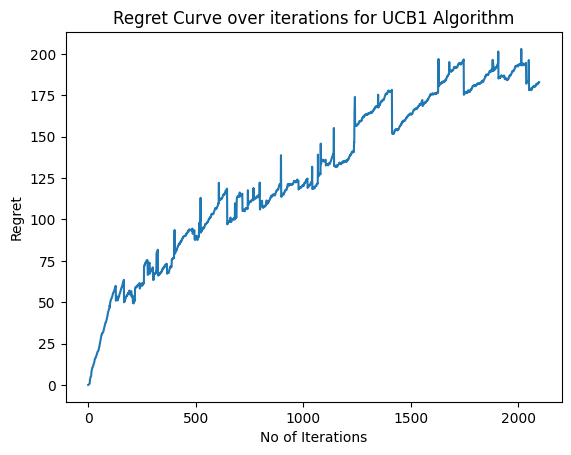

In [ ]:
plt.plot(regret_decay_ucb1)
plt.xlabel("No of Iterations")
plt.ylabel("Regret")
plt.title("Regret Curve over iterations for UCB1 Algorithm")
plt.show()

<hr><font size=4>3. Let the number of courses be 100 and find out the minimum number of iterations after which UCB1 strategy even performs worse than greedy</font>

In [ ]:
#Greedy algorithm
num_arms   = int(input("Enter no of Courses you want:"))

#maintaining the count of each arm is picked to ensure The number of pulls for any two arms will never differ by more than 1.
count_tracker = {}
for arm in range(num_arms):
  count_tracker[arm] = 0

#creating objects aka initalising reward dstribution to each arm
bandit_arms = []
for arm in range(num_arms):
  bandit_arms.append(Courses())
regret_greedy = []
time_steps = int(input("No of time steps to simulate:"))
for time_step_i in range(time_steps):

  if time_step_i == 0: #at time step zero i choose a arm randomly
    arm = random.choice([i for i in range(num_arms)])
    bandit_arms[arm].simulate()
    count_tracker[arm] += 1
    regret_greedy.append(0)

  else: #for all other time steps i choose the arm with max qt - greedy strategy
    Qt_arms = np.array([arm.Qt for arm in bandit_arms])
    max_Qt_idx = np.argmax(Qt_arms)

    #if all the arm played then set them to 0
    if sum(list(count_tracker.values())) == num_arms:
      for arm in range(num_arms):
        count_tracker[arm] = 0

    #if the max qt is already picked then choose any other arm randomly
    #in order to avoid number of pulls for any two arms will differing by more than 1.
    elif count_tracker[max_Qt_idx] == 1:
      while count_tracker[max_Qt_idx]==1:
        max_Qt_idx = random.choice([i for i in range(num_arms)])

    bandit_arms[max_Qt_idx].simulate()

    mx_regret = max(Qt_arms)*time_step_i
    cumm_regret = 0
    for i in range(num_arms):
      cumm_regret += (bandit_arms[i].Qt*bandit_arms[i].t)
    regret_greedy.append(mx_regret-cumm_regret)

    count_tracker[max_Qt_idx] += 1


Enter no of Courses you want:100
No of time steps to simulate:2100


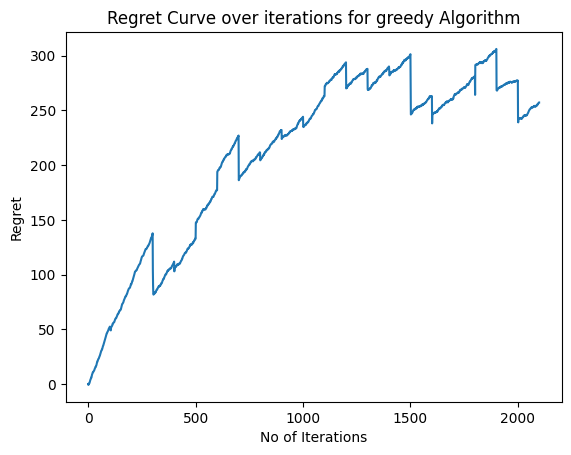

In [ ]:
plt.plot(regret_greedy)
plt.xlabel("No of Iterations")
plt.ylabel("Regret")
plt.title("Regret Curve over iterations for greedy Algorithm")
plt.show()

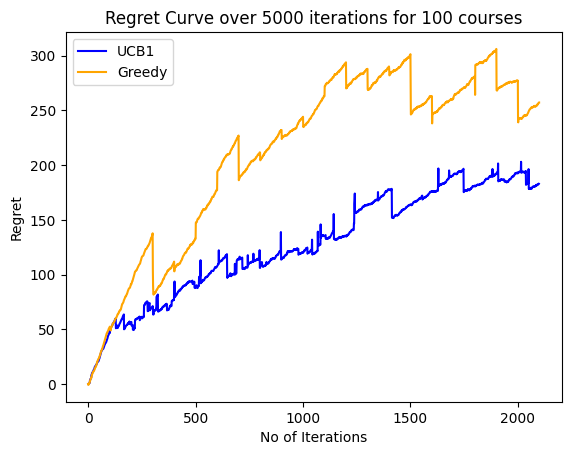

In [ ]:
plt.plot(regret_decay_ucb1,color='blue',label='UCB1')
plt.plot(regret_greedy,color='orange',label='Greedy')
#plt.plot(regret_decay_eps,color='red',label='decaying eps greedy')
plt.xlabel("No of Iterations")
plt.ylabel("Regret")
plt.title("Regret Curve over 5000 iterations for 100 courses")
plt.legend()
plt.show()

### Inference: Shortly over 300 iterations UCB1 starts performs worse than greedy algorithm

<hr>
<hr>